In [1]:
# Import warnings filter 
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import dask.array as da
import dask.dataframe as dd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.combine import SMOTETomek

from catboost import CatBoostClassifier

In [2]:
df = pd.read_csv("../data/creditcard.csv")

In [3]:
df.shape

(284807, 31)

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.head().T

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
df.isnull().values.any()

False

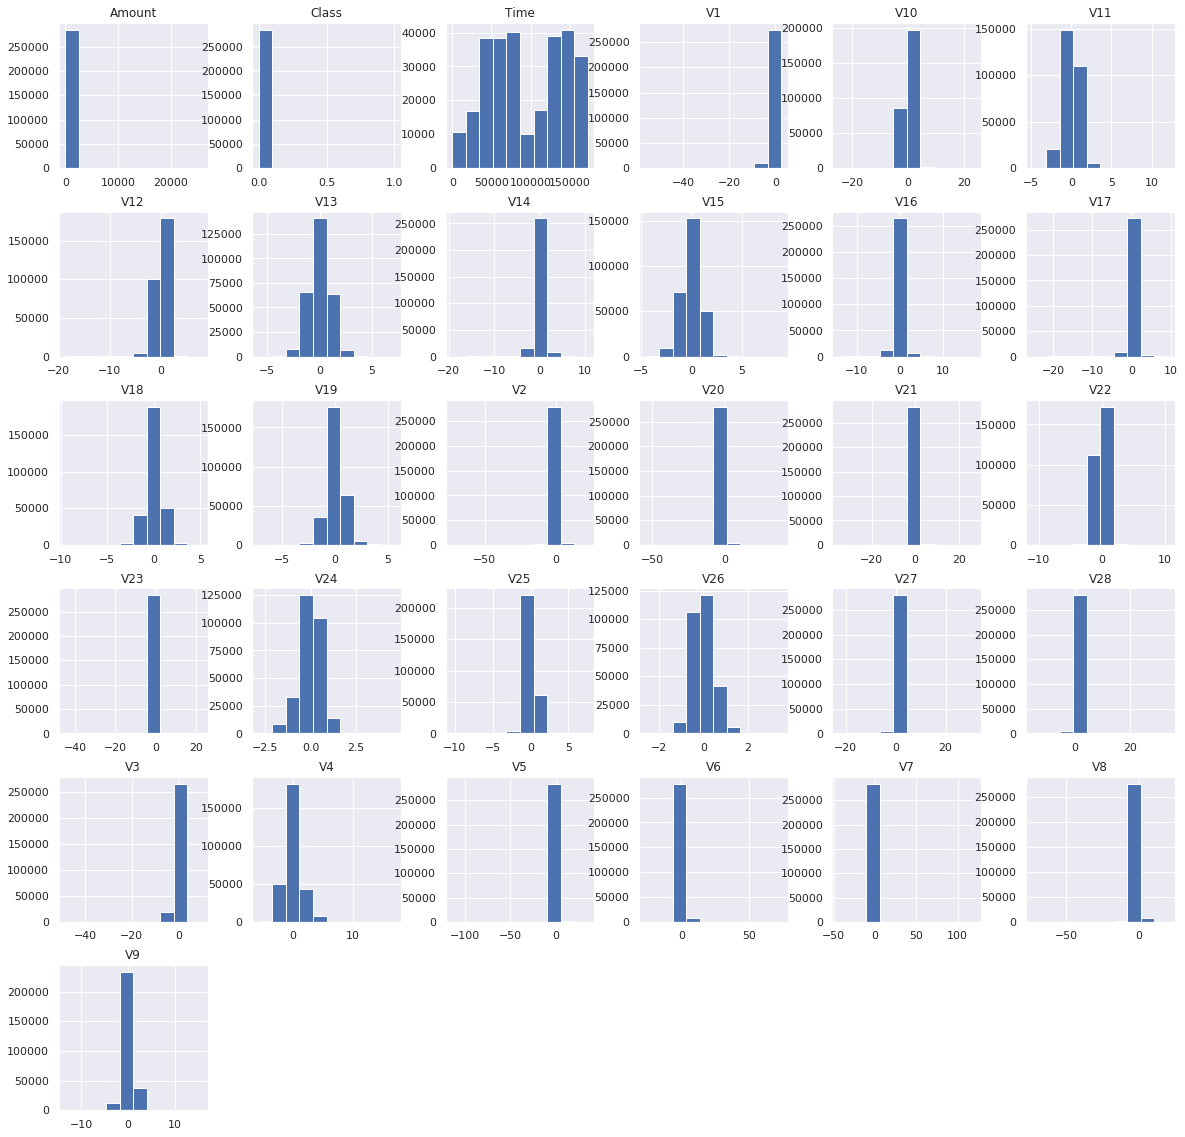

In [8]:
df.hist(figsize=(20,20))
plt.show()

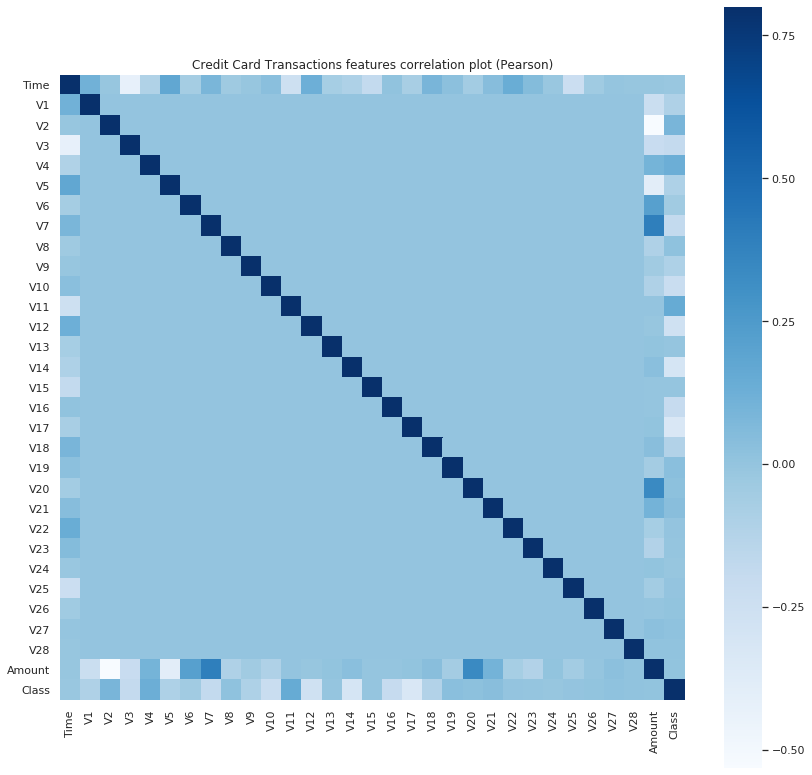

In [9]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,vmax=0.8,square = True, cmap="Blues")
plt.show();

# Study fraudent behaviours

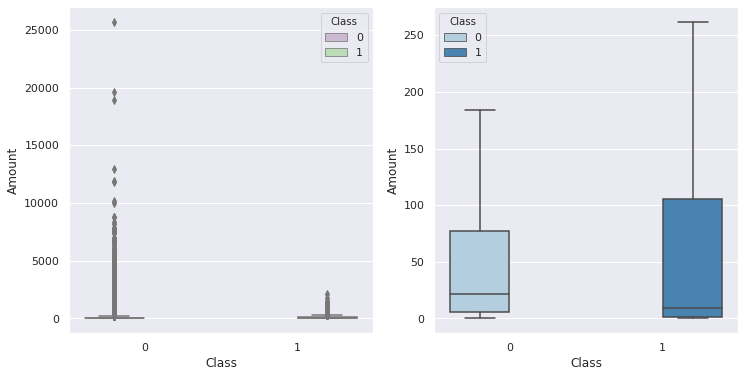

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="Blues",showfliers=False)
plt.show();

In [11]:
df.groupby(['Class'])['Amount'].agg({'min','max','mean','median','std', 'count'}).reset_index()

,Class,max,mean,std,min,median,count
0,0,25691.16,88.291022,250.105092,0.0,22.00,284315
1,1,2125.87,122.211321,256.683288,0.0,9.25,492


In [12]:
Fraud = df[df['Class']==1]
Normal = df[df['Class']==0]

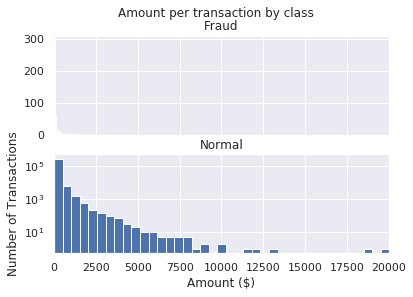

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

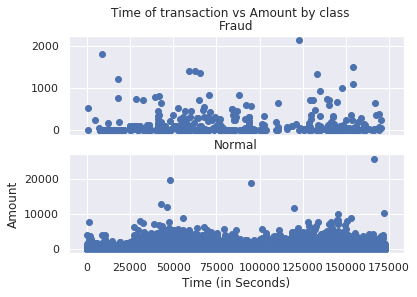

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show();

In [15]:
#Determine the number of fraud and valid transactions in the dataset.
Fraud = df[df['Class']==1]
Valid = df[df['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.0017304750013189597
Fraud Cases : 492
Valid Cases : 284315


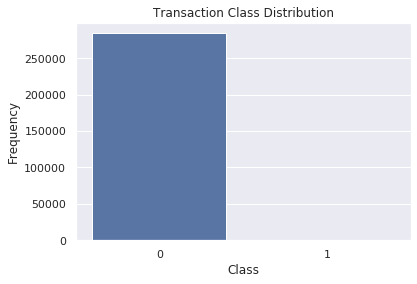

In [16]:
ax = sns.countplot(x="Class", data=df)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");

In [17]:
y = df['Class']
X = df.drop(columns='Class', axis=1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

In [19]:
X_train.shape, X_test.shape

((170884, 30), (113923, 30))

In [20]:
smk = SMOTETomek(random_state = 42)
X_ov_smk, y_ov_smk = smk.fit_sample(X_train,y_train)
X_train = X_ov_smk
y_train = y_ov_smk

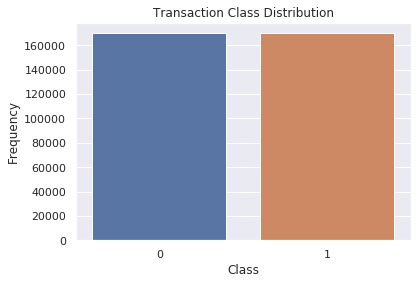

In [21]:
y_temp = pd.DataFrame(data=y_train, columns=['Class'])
ax = sns.countplot(x="Class", data=y_temp)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");

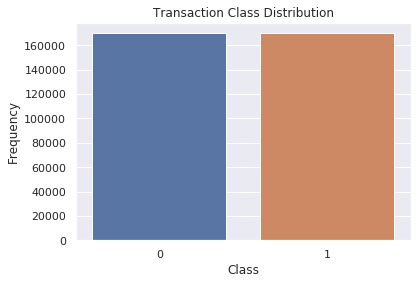

In [25]:
y_temp = pd.DataFrame(data=y_train_dask, columns=['Class'])
ax = sns.countplot(x="Class", data=y_temp)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from datetime import datetime

In [24]:
start_time = datetime.now()
# Building with Pandas
clf_model = CatBoostClassifier(n_estimators=1000,learning_rate=0.0801032, random_seed= 123456, l2_leaf_reg=4, use_best_model=True)
clf_model.fit(X_train, y_train,eval_set=[(X_train,y_train),(X_test, y_test)])
end_time = datetime.now()
print(f'Duration: {end_time-start_time}')

0:	learn: 0.5163692	test: 0.5163692	test1: 0.5567870	best: 0.5567870 (0)	total: 229ms	remaining: 3m 48s
1:	learn: 0.4037654	test: 0.4037654	test1: 0.4419540	best: 0.4419540 (1)	total: 426ms	remaining: 3m 32s
2:	learn: 0.3130622	test: 0.3130622	test1: 0.3640974	best: 0.3640974 (2)	total: 630ms	remaining: 3m 29s
3:	learn: 0.2491783	test: 0.2491783	test1: 0.2937337	best: 0.2937337 (3)	total: 792ms	remaining: 3m 17s
4:	learn: 0.2046953	test: 0.2046953	test1: 0.2400025	best: 0.2400025 (4)	total: 1.01s	remaining: 3m 20s
5:	learn: 0.1716329	test: 0.1716329	test1: 0.2027349	best: 0.2027349 (5)	total: 1.2s	remaining: 3m 18s
6:	learn: 0.1508218	test: 0.1508218	test1: 0.1807448	best: 0.1807448 (6)	total: 1.45s	remaining: 3m 26s
7:	learn: 0.1340979	test: 0.1340979	test1: 0.1561311	best: 0.1561311 (7)	total: 1.83s	remaining: 3m 47s
8:	learn: 0.1209754	test: 0.1209754	test1: 0.1376360	best: 0.1376360 (8)	total: 2.13s	remaining: 3m 54s
9:	learn: 0.1105106	test: 0.1105106	test1: 0.1230046	best: 0.1230

In [25]:
y_pred = clf_model.predict(X_test)

In [26]:
print('Classification report for Pandas:')
print(classification_report(y_test, y_pred))
print("-----------------------------------\n")
print('Confusion Metrix for Pandas: ')
print(confusion_matrix(y_test, y_pred))
print("-----------------------------------\n")
print('ROC-AUC score for Pandas')
print(roc_auc_score(y_test, y_pred))
print("-----------------------------------\n")

Classification report for Pandas:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113732
           1       0.77      0.86      0.81       191

    accuracy                           1.00    113923
   macro avg       0.88      0.93      0.90    113923
weighted avg       1.00      1.00      1.00    113923

-----------------------------------

Confusion Metrix for Pandas: 
[[113682     50]
 [    27    164]]
-----------------------------------

ROC-AUC score for Pandas
0.9290995567240559
-----------------------------------



In [35]:
print('Done!')

Done!
